In [1]:
import tensorflow as tf
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import kerastuner

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Extraction des images


In [3]:
# download data from Stanfords Dogs Dataset
data_dir = tf.keras.utils.get_file(
    fname='images.tar',
    origin='http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar',
    cache_subdir='datasets',
    extract=False,
    cache_dir='./')

In [4]:
basedir = os.path.abspath('./datasets')
for name_dir in os.listdir(basedir):
    if not os.path.isdir(os.path.join(basedir, name_dir)):  # Not a directory
        continue
    if 'n02' in name_dir:  # Invalid format
        new_name = name_dir.split(sep='-', maxsplit=1)[1]
        os.rename(
            os.path.join(basedir, name_dir),
            os.path.join(basedir, new_name))

# Visualisation des images


In [5]:
import os

dir_path = './datasets'
print(os.listdir(dir_path))

['Images', 'images.tar']


In [6]:
import tarfile

tar_file_path = './datasets/images.tar'
with tarfile.open(tar_file_path, 'r') as tar:
    tar.extractall('./datasets')

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='./datasets/Images',
    labels='inferred',
    seed=18)

Found 20580 files belonging to 120 classes.


In [8]:
num_classes = len(dataset.class_names)
print(f'Il y a {num_classes} classes de race de chien dans notre dataset')

Il y a 120 classes de race de chien dans notre dataset


In [9]:
list_classes = []
list_size = []

basedir = os.path.abspath('./datasets/Images')
for name_class in os.listdir(basedir):
    class_path = os.path.join(basedir, name_class)
    list_classes.append(name_class)
    list_size.append(len(os.listdir(class_path)))

df = pd.DataFrame({'classes':list_classes, 'size':list_size})

In [10]:
df.head()

classes  size
0         n02085620-Chihuahua   152
1  n02085782-Japanese_spaniel   185
2       n02085936-Maltese_dog   252
3          n02086079-Pekinese   149
4          n02086240-Shih-Tzu   214

<AxesSubplot:xlabel='size', ylabel='classes'>

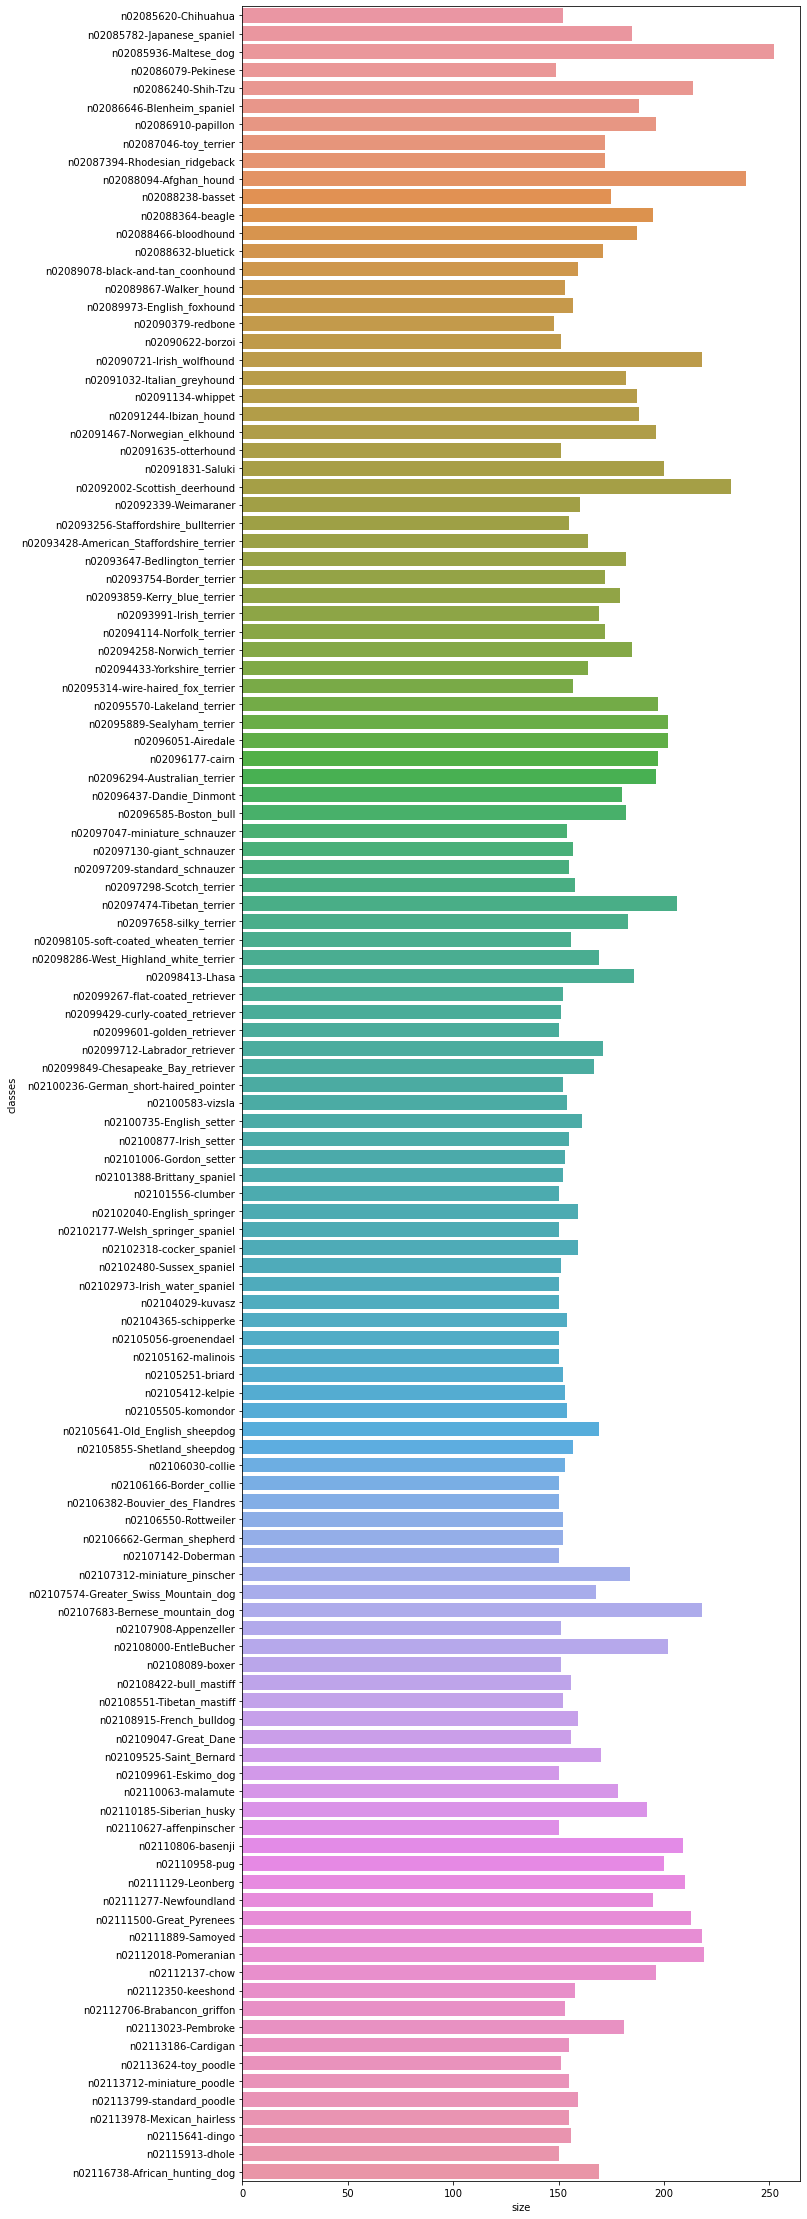

In [11]:
plt.figure(figsize=(10,40))
sns.barplot(x='size', y='classes', data=df)

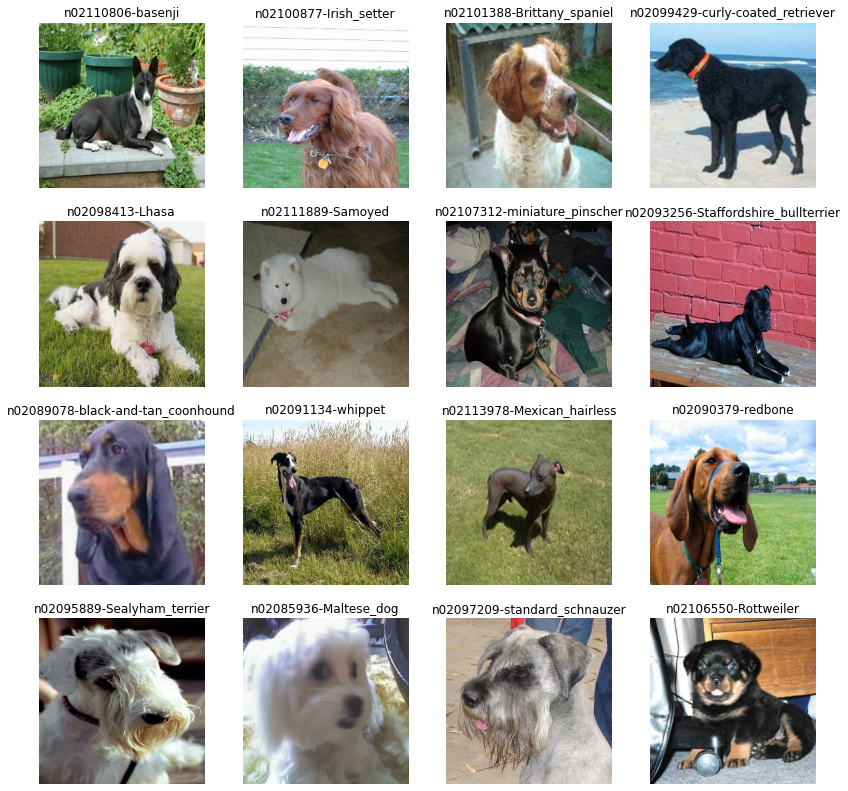

In [12]:
class_names = dataset.class_names

plt.figure(figsize=(14, 14))
for image_list, label_list in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_list[i].numpy().astype("uint8"))
        plt.title(class_names[label_list[i]])
        plt.axis("off")

Text(0.5, 1.0, 'n02101388-Brittany_spaniel')

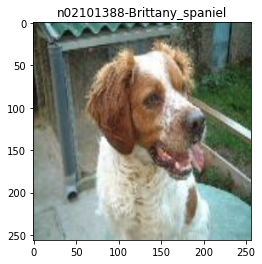

In [13]:
image = image_list[2].numpy().astype("uint8")
label = class_names[label_list[2]]

plt.imshow(image)
plt.title(label)


In [14]:
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [15]:
def plot(images, data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    plt.show()

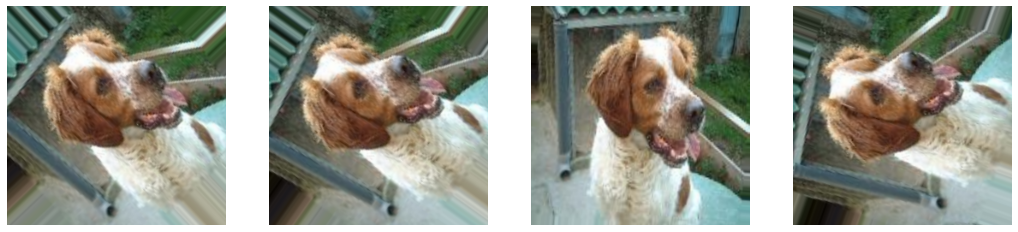

In [16]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=90)
plot(images, data_generator)

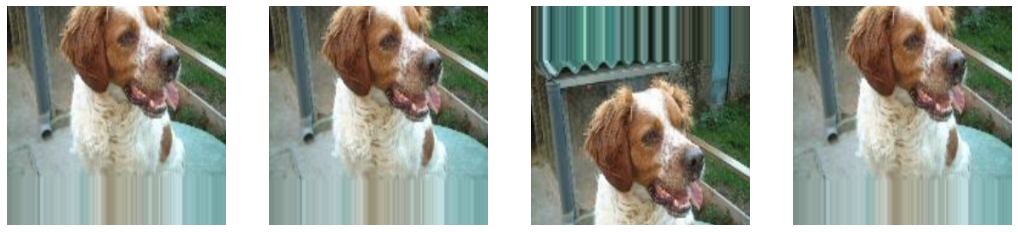

In [17]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.3)
plot(images, data_generator)

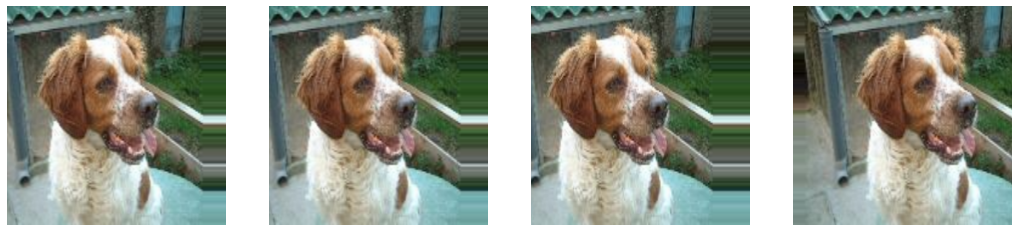

In [18]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=0.3)
plot(images, data_generator)

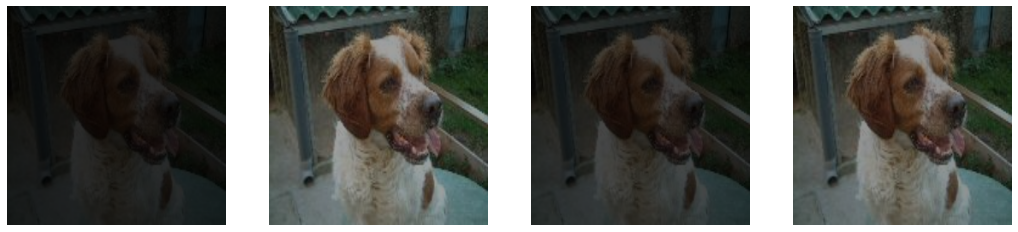

In [19]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=(0.1, 0.9))
plot(images, data_generator)

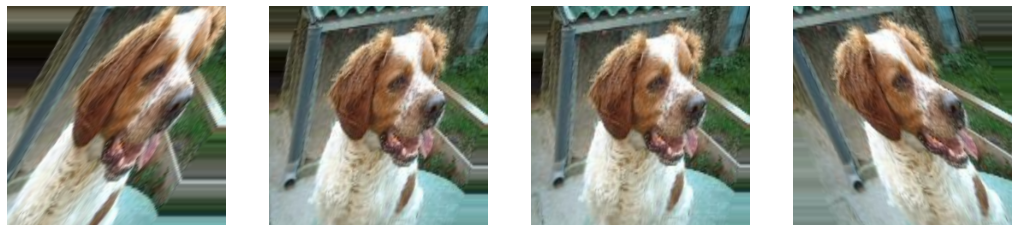

In [20]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=45.0)
plot(images, data_generator)

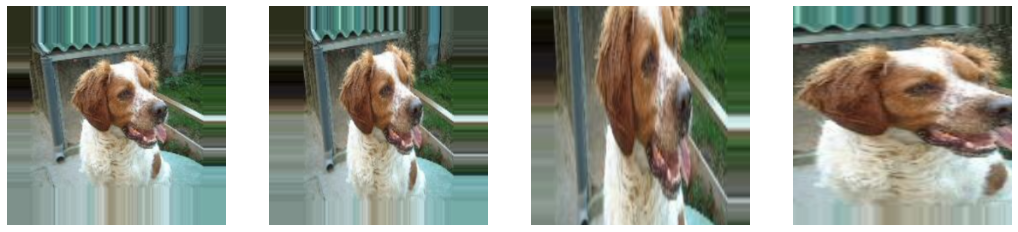

In [21]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.5, 1.5])
plot(images, data_generator)

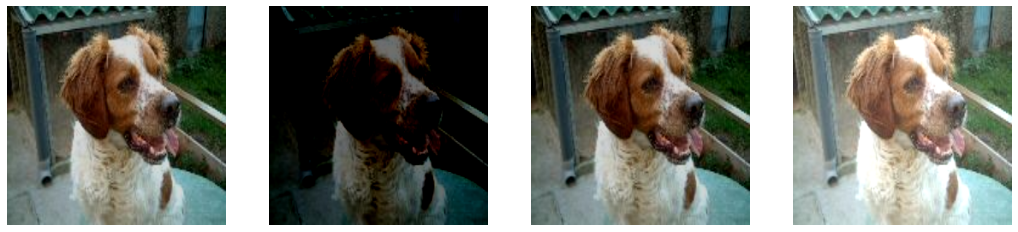

In [22]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(channel_shift_range=150.0)
plot(images, data_generator)

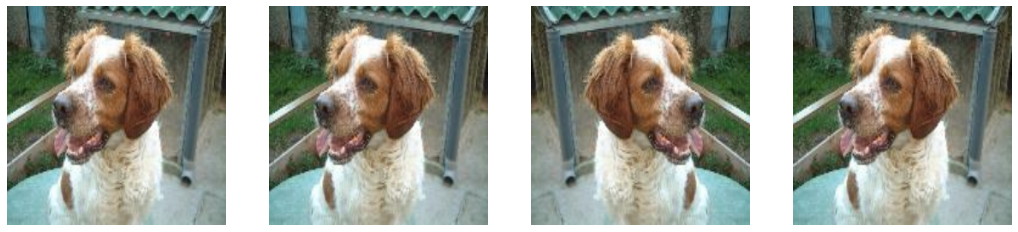

In [23]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)
plot(images, data_generator)

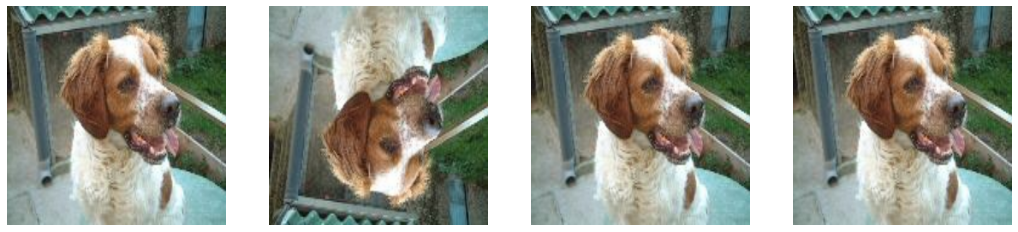

In [24]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(vertical_flip=True)
plot(images, data_generator)

In [25]:
batch_size = 32
img_height = 160
img_width = 160
img_shape = (img_height, img_width)
IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)

In [26]:
no_augmentation_kwargs = dict(
    rescale=1./255,
    validation_split=0.2)

In [27]:
train_datagen_no_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(**no_augmentation_kwargs)

train_generator_no_augmentation = train_datagen_no_augmentation.flow_from_directory(
    directory='./datasets/Images',
    target_size=img_shape,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True)

Found 16508 images belonging to 120 classes.


In [28]:
validation_datagen_no_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(**no_augmentation_kwargs)

validation_generator_no_augmentation = validation_datagen_no_augmentation.flow_from_directory(
    directory='./datasets/Images',
    target_size=img_shape,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True)

Found 4072 images belonging to 120 classes.


## Avec Data Augmentation


In [29]:
augmentation_kwargs = dict(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.3,
    height_shift_range=0.3,
    brightness_range=(0.1, 0.9),
    shear_range=45.0,
    zoom_range=[0.5, 1.5],
    channel_shift_range=150.0,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2)

In [30]:
train_datagen_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_kwargs)

train_generator_augmentation = train_datagen_augmentation.flow_from_directory(
    directory='./datasets/Images',
    target_size=img_shape,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True)

Found 16508 images belonging to 120 classes.


In [31]:
validation_datagen_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(**no_augmentation_kwargs)

validation_generator_augmentation = validation_datagen_augmentation.flow_from_directory(
    directory='./datasets/Images',
    target_size=img_shape,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True)

Found 4072 images belonging to 120 classes.


In [32]:
os.makedirs('./results/CNN/data_augmentation/', exist_ok=True)
os.makedirs('./results/CNN/no_data_augmentation/', exist_ok=True)

# Model CNN simple


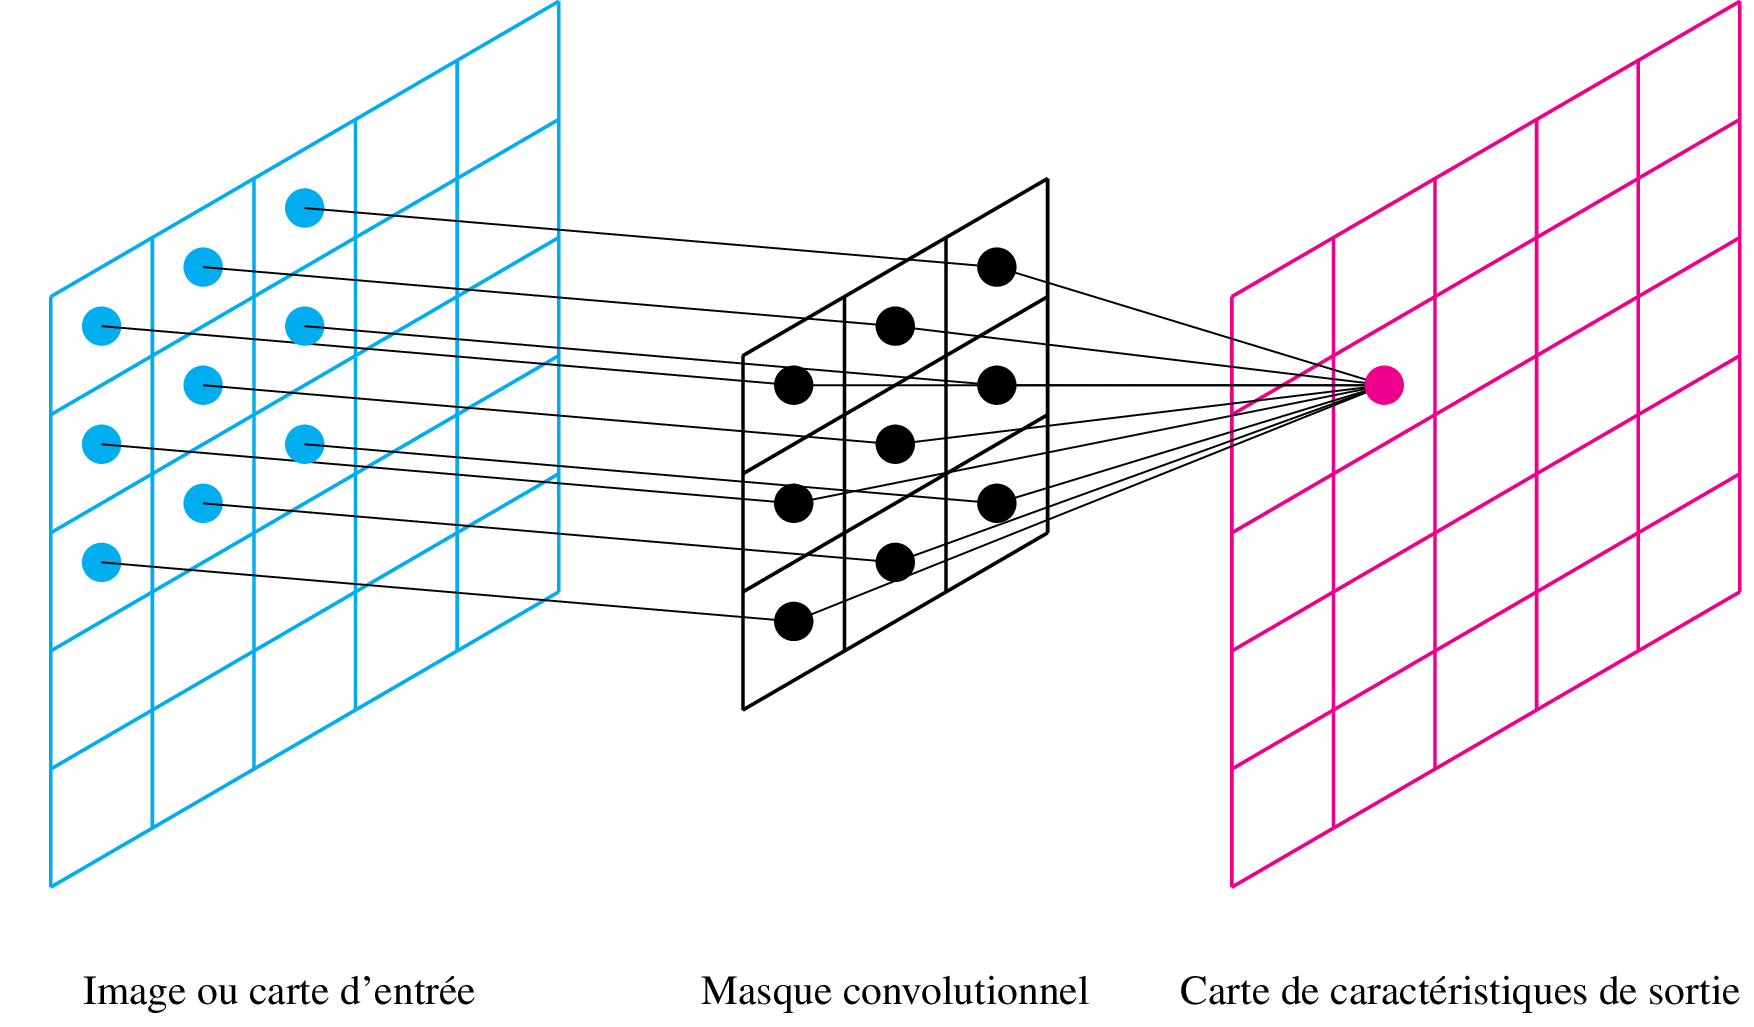

In [33]:
model_base = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(train_generator_no_augmentation.num_classes, activation='softmax')
])

In [34]:
model_base.build((None, 160, 160, 3)) # `input_shape` is the shape of the input data
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

In [35]:
model_base.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

In [36]:
steps_per_epoch = train_generator_no_augmentation.samples // train_generator_no_augmentation.batch_size
validation_steps = validation_generator_no_augmentation.samples // validation_generator_no_augmentation.batch_size

if os.path.exists('./results/CNN/no_data_augmentation/history.npy'):
    history_base=np.load('./results/CNN/no_data_augmentation/history.npy',allow_pickle='TRUE').item()
else:
    history = model_base.fit(
    train_generator_no_augmentation,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator_no_augmentation,
    validation_steps=validation_steps)
    
    history_base = history.history
    np.save('./results/CNN/no_data_augmentation/history.npy',history_base)

Epoch 1/10
515/515 [==============================] - 557s 1s/step - loss: 4.7867 - accuracy: 0.0106 - val_loss: 4.7824 - val_accuracy: 0.0123
Epoch 2/10
515/515 [==============================] - 402s 780ms/step - loss: 4.6957 - accuracy: 0.0165 - val_loss: 4.5299 - val_accuracy: 0.0337
Epoch 3/10
515/515 [==============================] - 402s 780ms/step - loss: 4.3345 - accuracy: 0.0514 - val_loss: 4.2916 - val_accuracy: 0.0568
Epoch 4/10
515/515 [==============================] - 434s 843ms/step - loss: 3.9657 - accuracy: 0.1011 - val_loss: 4.2037 - val_accuracy: 0.0691
Epoch 5/10
515/515 [==============================] - 442s 857ms/step - loss: 3.4666 - accuracy: 0.1842 - val_loss: 4.4528 - val_accuracy: 0.0787
Epoch 6/10
515/515 [==============================] - 346s 672ms/step - loss: 2.7859 - accuracy: 0.3148 - val_loss: 4.9003 - val_accuracy: 0.0716
Epoch 7/10
515/515 [==============================] - 347s 674ms/step - loss: 2.0361 - accuracy: 0.4771 - val_loss: 5.8895 - va

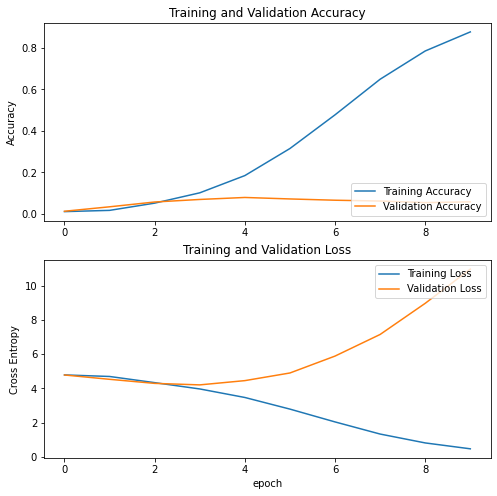

In [37]:
acc = history_base['accuracy']
val_acc = history_base['val_accuracy']

loss = history_base['loss']
val_loss = history_base['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Avec Data Augmentation


In [38]:
model_base = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(train_generator_augmentation.num_classes, activation='softmax')
])

In [39]:
model_base.build((None, 160, 160, 3)) # `input_shape` is the shape of the input data
model_base.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 79, 79, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 77, 77, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 36, 36, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 32)      

In [40]:
model_base.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

In [41]:
steps_per_epoch = train_generator_augmentation.samples // train_generator_augmentation.batch_size
validation_steps = validation_generator_augmentation.samples // validation_generator_augmentation.batch_size

if os.path.exists('./results/CNN/data_augmentation/history.npy'):
    history_base=np.load('./results/CNN/data_augmentation/history.npy',allow_pickle='TRUE').item()
else:
    history = model_base.fit(
    train_generator_augmentation,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator_augmentation,
    validation_steps=validation_steps)
    
    history_base = history.history
    np.save('./results/CNN/data_augmentation/history.npy',history_base)

Epoch 1/10
515/515 [==============================] - 398s 769ms/step - loss: 4.7870 - accuracy: 0.0102 - val_loss: 4.7830 - val_accuracy: 0.0113
Epoch 2/10
515/515 [==============================] - 397s 770ms/step - loss: 4.7830 - accuracy: 0.0120 - val_loss: 4.7800 - val_accuracy: 0.0123
Epoch 3/10
515/515 [==============================] - 397s 771ms/step - loss: 4.7815 - accuracy: 0.0123 - val_loss: 4.7794 - val_accuracy: 0.0116
Epoch 4/10
515/515 [==============================] - 434s 843ms/step - loss: 4.7810 - accuracy: 0.0121 - val_loss: 4.7791 - val_accuracy: 0.0123
Epoch 5/10
515/515 [==============================] - 547s 1s/step - loss: 4.7807 - accuracy: 0.0123 - val_loss: 4.7790 - val_accuracy: 0.0123
Epoch 6/10
515/515 [==============================] - 405s 787ms/step - loss: 4.7805 - accuracy: 0.0123 - val_loss: 4.7790 - val_accuracy: 0.0123
Epoch 7/10
515/515 [==============================] - 403s 783ms/step - loss: 4.7805 - accuracy: 0.0122 - val_loss: 4.7790 - va

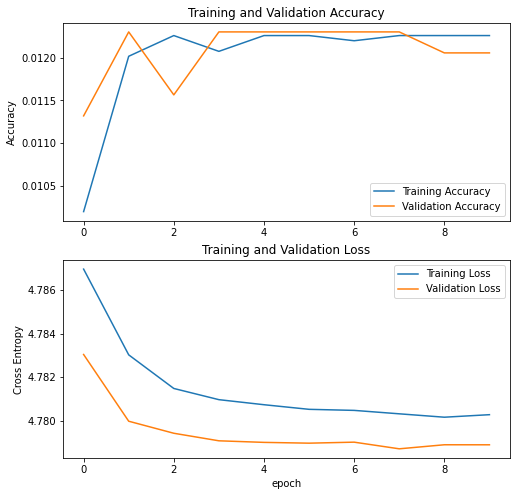

In [42]:
acc = history_base['accuracy']
val_acc = history_base['val_accuracy']

loss = history_base['loss']
val_loss = history_base['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Ce graphique est très différent du précédent. Le scores sur le jeu d'entraînement et de validation sont similaires et augmente avec le temps. Donc le modèle s'améliore avec les epochs et est capable de généraliser. En revanche les prédictions sont peu précises car seulement 2 % des prédictions sont correctes.

Pour conclure la Data Augmentation permet d'éviter le problème de surapprentissage. Cependant on constate que notre modèle n'a pas de bonnes performances. Il est possible que 20 000 images n'est pas suffisant pour obtenir un bon score. On va donc d'intéresser à une approche de transfer learning.

# Transfer learning 


Dans cette partie on va utiliser des modèles pré-entraînés qui vont être utilisé pour faire comme du preprocessing de nos images. On va tester 2 modèles :


* ResNet50V2
* VGG16

In [43]:
IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)
base_learning_rate = 0.001
initial_epochs = 10
batch_size = 32

In [44]:
def makeGenerator(preprocessing_function):
    
    no_augmentation_kwargs = dict(
        validation_split=0.2)
    
    augmentation_kwargs = dict(
        rotation_range=90,
        width_shift_range=0.3,
        height_shift_range=0.3,
        brightness_range=(0.1, 0.9),
        shear_range=45.0,
        zoom_range=[0.5, 1.5],
        channel_shift_range=150.0,
        horizontal_flip=True,
        vertical_flip=True,
        validation_split=0.2)

    train_datagen_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(**augmentation_kwargs, preprocessing_function=preprocessing_function)

    train_generator_augmentation = train_datagen_augmentation.flow_from_directory(
        directory='./datasets/Images',
        target_size=IMG_SIZE,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True)

    validation_datagen_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(**no_augmentation_kwargs, preprocessing_function=preprocessing_function)

    validation_generator_augmentation = validation_datagen_augmentation.flow_from_directory(
        directory='./datasets/Images',
        target_size=IMG_SIZE,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False)
    
    return train_generator_augmentation, validation_generator_augmentation

In [45]:
def makeTFmodel(tf_model):
       
    model_kwargs = dict(
        include_top=False,
        weights='imagenet',
        input_tensor=None,
        input_shape=IMG_SHAPE,
        pooling=None,
        classes=1000)
    
    base_model = tf_model(**model_kwargs)
    base_model.trainable = False
    base_model.summary()
    
    global_avg_layer = tf.keras.layers.GlobalAveragePooling2D()
    prediction_layer = tf.keras.layers.Dense(120, activation='softmax')
    
    inputs = tf.keras.Input(IMG_SHAPE)
    x = base_model(inputs, training=False)
    x = global_avg_layer(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
    
    return model

In [46]:
def evaluateTFmodel(model, train_gen, validation_gen, results_path):
    
    os.makedirs(results_path, exist_ok=True)
   
    steps_per_epoch = train_gen.samples // train_gen.batch_size
    validation_steps = validation_gen.samples // validation_gen.batch_size

    if os.path.exists(results_path + 'history.npy'):
        history_dict = np.load(results_path + 'history.npy',allow_pickle='TRUE').item()
    else:
        history = model.fit(
        train_gen,
        epochs=10,
        steps_per_epoch=steps_per_epoch,
        validation_data=validation_gen,
        validation_steps=validation_steps)

        history_dict = history.history
        np.save(results_path + 'history.npy',history_dict)
        
    return history_dict

## ResNet50V2

In [47]:
train_gen, validation_gen = makeGenerator(tf.keras.applications.resnet_v2.preprocess_input)

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


In [48]:
model_ResNet50V2 = makeTFmodel(tf.keras.applications.ResNet50V2)

94668760/94668760 [==============================] - 58s 1us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 166, 166, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 80, 80, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 40, 40, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 40, 40, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 40, 40, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 20, 20, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 20, 20, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 20, 20, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 20, 20, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 10, 10, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 12, 12, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 10, 10, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 10, 10, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 12, 12, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 5, 5, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 5, 5, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 5, 5, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 5, 5, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 5, 5, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

In [49]:
history_ResNet50V2 = evaluateTFmodel(model_ResNet50V2, train_gen, validation_gen, './results/TF/ResNet50V2/')

Epoch 1/10
515/515 [==============================] - 1032s 2s/step - loss: 5.0431 - accuracy: 0.0628 - val_loss: 2.8563 - val_accuracy: 0.3548
Epoch 2/10
515/515 [==============================] - 994s 2s/step - loss: 4.5930 - accuracy: 0.1020 - val_loss: 2.6407 - val_accuracy: 0.4050
Epoch 3/10
515/515 [==============================] - 1001s 2s/step - loss: 4.4689 - accuracy: 0.1203 - val_loss: 2.4027 - val_accuracy: 0.4535
Epoch 4/10
515/515 [==============================] - 994s 2s/step - loss: 4.4518 - accuracy: 0.1224 - val_loss: 2.5068 - val_accuracy: 0.4397
Epoch 5/10
515/515 [==============================] - 998s 2s/step - loss: 4.4321 - accuracy: 0.1251 - val_loss: 2.5079 - val_accuracy: 0.4584
Epoch 6/10
515/515 [==============================] - 1001s 2s/step - loss: 4.4021 - accuracy: 0.1297 - val_loss: 2.4220 - val_accuracy: 0.4577
Epoch 7/10
515/515 [==============================] - 978s 2s/step - loss: 4.3791 - accuracy: 0.1316 - val_loss: 2.4309 - val_accuracy: 0.4

## VGG16

In [50]:
train_gen, validation_gen = makeGenerator(tf.keras.applications.vgg16.preprocess_input)

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


In [51]:
model_VGG16 = makeTFmodel(tf.keras.applications.VGG16)

58889256/58889256 [==============================] - 28s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 160, 160, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 160, 160, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 80, 80, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 80, 80, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 80, 80, 128)       147584    
                                                             

In [52]:
history_VGG16 = evaluateTFmodel(model_VGG16, train_gen, validation_gen, './results/TF/VGG16/')

Epoch 1/10
515/515 [==============================] - 3046s 6s/step - loss: 7.7831 - accuracy: 0.0297 - val_loss: 8.8751 - val_accuracy: 0.2175
Epoch 2/10
515/515 [==============================] - 3022s 6s/step - loss: 5.8232 - accuracy: 0.0671 - val_loss: 6.4049 - val_accuracy: 0.3324
Epoch 3/10
515/515 [==============================] - 3040s 6s/step - loss: 5.1942 - accuracy: 0.0899 - val_loss: 5.7503 - val_accuracy: 0.3691
Epoch 4/10
515/515 [==============================] - 3026s 6s/step - loss: 4.8701 - accuracy: 0.0996 - val_loss: 5.1910 - val_accuracy: 0.3839
Epoch 5/10
515/515 [==============================] - 3016s 6s/step - loss: 4.6856 - accuracy: 0.1046 - val_loss: 4.6803 - val_accuracy: 0.4267
Epoch 6/10
515/515 [==============================] - 3023s 6s/step - loss: 4.5706 - accuracy: 0.1148 - val_loss: 4.5569 - val_accuracy: 0.4313
Epoch 7/10
515/515 [==============================] - 3016s 6s/step - loss: 4.5466 - accuracy: 0.1148 - val_loss: 4.5816 - val_accuracy:

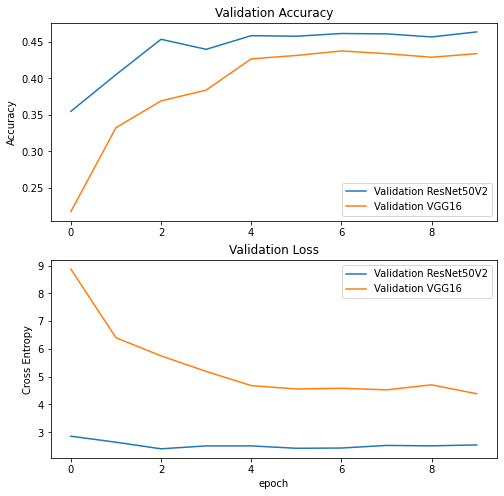

In [53]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history_ResNet50V2['val_accuracy'], label='Validation ResNet50V2')
plt.plot(history_VGG16['val_accuracy'], label='Validation VGG16')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(history_ResNet50V2['val_loss'], label='Validation ResNet50V2')
plt.plot(history_VGG16['val_loss'], label='Validation VGG16')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Validation Loss')
plt.xlabel('epoch')
plt.show()